In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def dfdx(f,x):
    "Возвращает производную функции"
    h=0.01
    return (f(x+h)-f(x))/h

In [3]:
def f(x):
    return x**2 - 25

In [5]:
#Метод Ньютона для решения уравнений
x = 1
eps = 0.01
for k in range(100):
    xLast = x
    x = xLast - f(xLast)/dfdx(f,xLast)
    if (f(x))**2<eps**2:
        break

In [6]:
x

5.000038323307951

In [7]:
x = np.linspace(0, 10, 50)

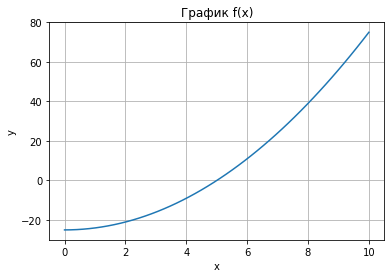

In [8]:
plt.title("График f(x)") # заголовок
plt.xlabel("x") # ось абсцисс
plt.ylabel("y") # ось ординат
plt.grid()      # включение отображение сетки
plt.plot(x, f(x))  # построение графика

In [9]:
#Метод Ньютона для матриц

In [10]:
def f1(X):
    return 2*X[0]**2+X[1]

def f2(X):
    return X[0]+X[1]**2+2

F = [f1,f2]

def func1(X):
    return [2*X[0]**2+X[1],
           X[0]+X[1]**2+2]

def func(x):
    return [x[0]*math.cos(x[1])-4,
           x[0]*x[1]-x[1]-5]
def f3(x):
    return x[0]*math.cos(x[1])-4
def f4(x):
    return x[0]*x[1]-x[1]-5
F2 = [f3,f4]

In [11]:
def Jac(F,X):
    "Принимает вектор из функций и вектор-точку"
    "Возвращает матрицу Якобиан в этой точке"
    n = len(X)
    h=0.001
    jac = np.zeros((n,n),'float')
    for i in range(n):
        for j in range(n):
            tmp = X[j]
            f0 = F[i](X)
            X[j] = tmp+h
            f1 = F[i](X)
            jac[i,j] = (f1-f0)/h
            X[j] = tmp
    return jac

In [12]:
#алгорит Ньютона
eps = 0.01
n=2
xRes = []
x = np.array([1.,1.])
for k in range(100):
    for i in range(n):
        x[i] = x[i] - np.dot(np.linalg.inv(Jac(F2,x))[i],[F2[0](x),F2[1](x)])
    xRes.append(x)
    if np.dot([F2[0](x),F2[1](x)],[F2[0](x),F2[1](x)])<eps**2:
        break
                             

In [13]:
x

array([6.50438764, 0.90842125])

In [14]:
from scipy.optimize import root

In [15]:
sol = root(func,[1,1])

In [16]:
sol.x #проверка решения

array([6.50409711, 0.90841421])